In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import os

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
filename = os.getcwd() + '/q1a/q1a.txt'
data = pd.read_csv(filename, sep="\t", header=0)

	 107    1.07022
Name: VGB, dtype: float64 107    7.637410e-07
Name: ID, dtype: float64 [2.66963237]


/home/gsantos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


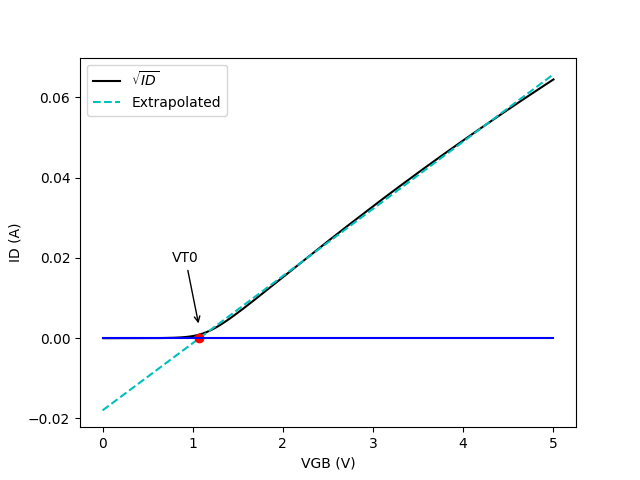

In [3]:
sqrt_id = np.sqrt(data['ID'])
vgb = data['VGB']

# Extrapolation
coeff = np.polyfit(vgb[106:], sqrt_id[106:], 1)
equation = np.poly1d(coeff)
xp = np.linspace(0,5,vgb.shape[0])

# Intersection between x-axis and the extrapolated curve
idx = np.argwhere(np.diff(np.sign(equation(xp)-np.zeros(xp.shape)))).flatten()
vto = vgb[idx]
iowl = data['ID'].iloc[idx]
n = np.asarray(((data['VGB'].iloc[100]-vto)/0.026)/(np.log(data['ID'].iloc[100])-np.log(iowl)))
beta = (coeff[0]**2)*2*n[0]
Is = beta*n[0]*(0.026**2)/2
print('\t',vto, iowl, n)

plt.figure(0)
plt.plot(vgb, sqrt_id, 'k-', label=r'$\sqrt{ID}$')
plt.plot(xp, equation(xp), 'c--', label='Extrapolated')
plt.plot(xp[idx], equation[idx], 'ro')
plt.plot(xp, np.zeros(xp.shape), 'b-')
plt.annotate('VT0', xy=(xp[idx], 0.003), xytext=(xp[idx]-0.3,0.02), arrowprops={'arrowstyle': '->'}, va='center')
plt.legend()
plt.xlabel('VGB (V)')
plt.ylabel('ID (A)')
plt.show()

102.88067046453382


<IPython.core.display.Javascript object>


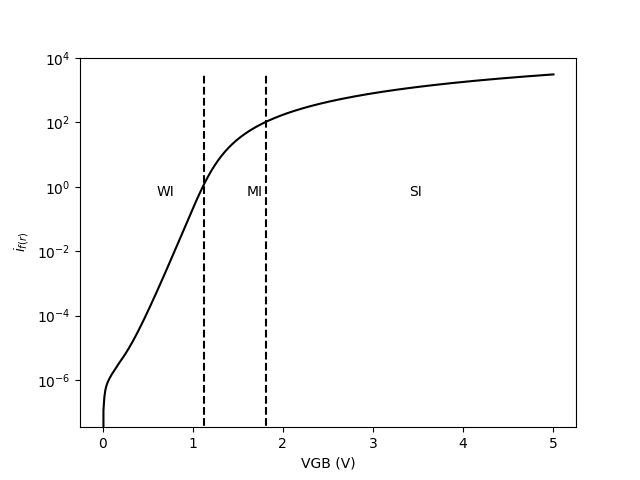

In [4]:
normalized_if = data['ID']/Is

strong_inv = normalized_if[normalized_if > 100]
strong_inv_idx = strong_inv.index.values.astype(int)

moderate_inv = normalized_if[(normalized_if > 0.99) & (normalized_if < 100.1)]
moderate_inv_idx = moderate_inv.index.values.astype(int)

weak_inv = normalized_if[normalized_if < 1]
weak_inv_idx = weak_inv.index.values.astype(int)

a = np.full(normalized_if.shape, vgb[moderate_inv_idx[0]])
b = np.full(normalized_if.shape, vgb[strong_inv_idx[0]])
print(strong_inv.iloc[0])
plt.figure(1)
plt.semilogy(vgb, normalized_if, color='k')
plt.plot(a, normalized_if, 'k--')
plt.plot(b, normalized_if, 'k--')
# plt.semilogy(vgb[strong_inv_idx], strong_inv, 'r-', label='Strong-Inversion')
# plt.semilogy(vgb[moderate_inv_idx], moderate_inv, 'y-', label='Moderate-Inversion')
# plt.semilogy(vgb[weak_inv_idx], weak_inv, 'c-', label='Weak-Inversion')
plt.text(0.6, 0.5, 'WI')
plt.text(1.6, 0.5, 'MI')
plt.text(3.4, 0.5, 'SI')
# plt.legend(loc='lower right')
plt.xlabel('VGB (V)')
plt.ylabel(r'$i_{f(r)}$')
plt.show()

In [5]:
k1 = n*0.026*np.log(1) + vto
k10 = n*0.026*np.log(10) + vto
k100 = n*0.026*np.log(100) + vto
print(k10-k1, k100-k10)
print(n)

107    0.159823
Name: VGB, dtype: float64 107    0.159823
Name: VGB, dtype: float64
[2.66963237]


In [6]:
filename = os.getcwd() + '/q1b/VSBxIDxVGB={}.txt'.format(2)
data = pd.read_csv(filename, sep="\t", header=0)

In [7]:
vg = 5
print(data[(data['ID']>(Is-1e-6))&(data['ID']<(Is+1e-6))], Is)
x0 = 2.03144
y0 = 1.357970e-06
x1 = 2.04139
y1 = 1.018450e-06 
k1 = Is - y0
k2 = y1 - y0
x = (k1/k2)*(x1-x0) + x0
n3 = (vg-vto)/x
vt1 = -vto + vg - n3*0.026*np.log(1) 
vt10 = -vto + vg - n3*0.026*np.log(10) 
vt100 = -vto + vg - n3*0.026*np.log(100) 
print(vt10-vt1, vt100-vt10)
print('\t',x, n3)

         VSB            ID      VGB
39  0.390140  2.073470e-06  2.00012
40  0.400128  1.557080e-06  2.00012
41  0.410149  1.153420e-06  2.00012
42  0.420137  8.442450e-07  2.00012
43  0.430125  6.112320e-07  2.00012
44  0.440148  4.380170e-07  2.00012 1.3498551221813254e-06
107   -0.115798
Name: VGB, dtype: float64 107   -0.115798
Name: VGB, dtype: float64
	 2.031677815251814 107    1.934254
Name: VGB, dtype: float64


In [8]:
vsb = [0.40527, 0.912603, 1.458, 2.032]
nn = [2.29, 2.11, 2.01, 1.93]
coeff2 = np.polyfit(vsb, nn, 1)
eq = np.poly1d(coeff2)
vgg = 0
eq_t = np.poly1d([1, -2.34, -0.22*vto+0.22*vgg])
xaxis = np.linspace(0, 3, data['VSB'].shape[0])
print('\t', np.roots(eq_t))

plt.figure(2)
for vg in range(2,6):
    filename = os.getcwd() + '/q1b/VSBxIDxVGB={}.txt'.format(vg)
    data = pd.read_csv(filename, sep="\t", header=0)
    nn1 = (vg-np.asarray(vto))/data['VSB']
    plt.semilogy(data['VSB'], nn1, label='VGB = {}V'.format(vg))
plt.plot(vsb, nn, 'ro')
plt.plot(xaxis, eq(xaxis), 'k-')
plt.legend(loc='upper right')
plt.xlabel('VSB (V)')
plt.ylabel('n')
plt.show()


	 [ 2.43662875 -0.09662875]


<IPython.core.display.Javascript object>

In [9]:
filename = os.getcwd() + '/q1c/q1c.txt'
data = pd.read_csv(filename, sep="\t", header=0)
import matplotlib.patches as patches

<IPython.core.display.Javascript object>


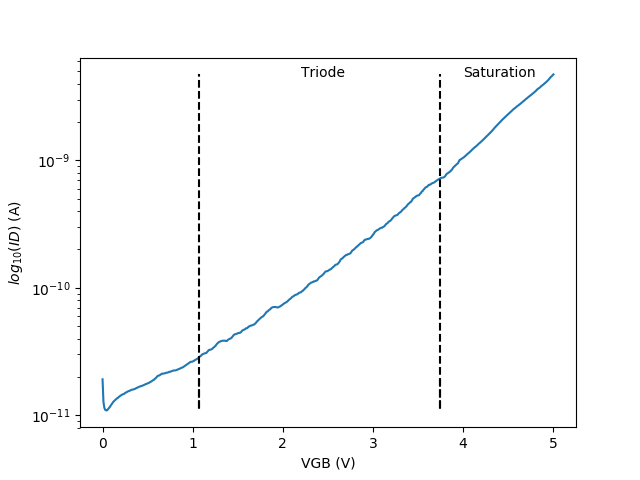

In [10]:
nc = 2.67
d10 = data[(data['VDS']>0.009)&(data['VDS']<0.011)]
d100 = data[(data['VDS']>0.099)&(data['VDS']<0.110)]
d1 = data[(data['VDS']>0.9)]

vgg = n*d1['VDS'].iloc[0] + vto
sat_line = np.full(d1['ID'].shape[0], vgg)
vth_line = np.full(d10['ID'].shape[0], vto)

plt.figure(4)
# plt.plot(d10['VGB'], d10['ID'], label='VDS = 10mV')
style="Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style, color="k")
plt.semilogy(d1['VGB'], d1['ID'], label='VDS = 10mV')
# plt.plot(d100['VGB'], d100['ID'])
plt.plot(sat_line, d1['ID'], 'k--')
plt.plot(vth_line, d1['ID'], 'k--')
# plt.plot(d1['VGB'], d1['ID'])
plt.text(2.2, 4.5e-9, 'Triode')
plt.text(4, 4.5e-9, 'Saturation')
# a3 = patches.FancyArrowPatch((0.5,3.2e-11), (1.2,3.5e-11),connectionstyle="arc3,rad=-.5", **kw)
# plt.gca().add_patch(a3)
# plt.legend()
plt.xlabel('VGB (V)')
plt.ylabel(r'$log_{10}(ID)$ (A)')
# plt.ylabel(r'$log_{10} (ID)$')
plt.show()

In [28]:
filename = os.getcwd() + '/q5/q5.txt'
data = pd.read_csv(filename, sep="\t", header=0)

In [65]:
from scipy.optimize import curve_fit

<IPython.core.display.Javascript object>


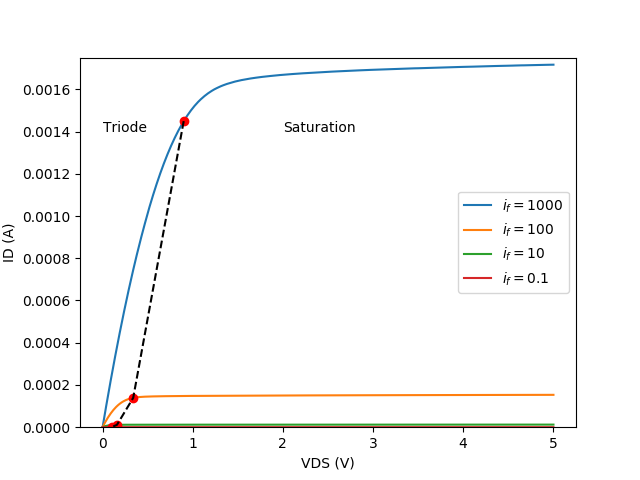

In [82]:
nc = 2.67
vg2 = data[(data['IREF']>1.6e-7)&(data['IREF']<1.7e-7)]
vg3 = data[(data['IREF']>1.6e-5)&(data['IREF']<1.7e-5)]
vg4 = data[(data['IREF']>1.6e-4)&(data['IREF']<1.7e-4)]
vg5 = data[(data['IREF']>1.6e-3)&(data['IREF']<1.7e-3)]
# print(vg2[(vg2['VDS'] > 0.09) & (vg2['VDS'] < 0.11)])
# print('\t',vg2['VDS'][10],vg2['ID'][10])

xp = [0.9001899999999999, 0.34013000000000004, 0.16009600000000002, 0.10009]
yp = [0.00144909, 0.000138973, 1.13384e-05, 8.812580000000001e-08]
xo = np.linspace(0,1, 501)

def exponenial_func(x, a, b, c):
    return a*np.exp(b*x)+c

popt, pcov = curve_fit(exponenial_func, xp, yp, p0=(1, 1e-6, 1))
equation = exponenial_func(xo, *popt)

plt.figure(5)
plt.plot(vg5['VDS'], vg5['ID'], label=r'$i_f = 1000$')
plt.plot(vg4['VDS'], vg4['ID'], label=r'$i_f = 100$')
plt.plot(vg3['VDS'], vg3['ID'], label=r'$i_f = 10$')
plt.plot(vg2['VDS'], vg2['ID'], label=r'$i_f = 0.1$')
plt.plot(xp, yp, 'ro')
plt.plot(xp, yp, 'k--')
# plt.plot(xo, equation)
# plt.plot(d100['VGB'], d100['ID'])
# plt.plot(sat_line5, vg5['ID'], 'k--')
# plt.plot(vth_line, vg5['ID'], 'k--')
# plt.plot(d1['VGB'], d1['ID'])
plt.text(0, 0.0014, 'Triode')
plt.text(2, 0.0014, 'Saturation')
# a3 = patches.FancyArrowPatch((0.5,3.2e-11), (1.2,3.5e-11),connectionstyle="arc3,rad=-.5", **kw)
# plt.gca().add_patch(a3)
plt.legend()
plt.xlabel('VDS (V)')
plt.ylabel('ID (A)')
plt.ylim(0,0.00175)
# plt.ylabel(r'$log_{10} (ID)$')
plt.show()
# [0.9001899999999999, 0.34013000000000004, 0.16009600000000002, 0.10009]
# [0.00144909, 0.000138973, 1.13384e-05, 8.812580000000001e-08]